# Overfitting & Ridge Regression

First, prepare the data from $ sin(x^2) $ with some noise.

In [83]:
import numpy as np
def create_data(random_seed=42):
    model_function=lambda x: np.sin(x*x)
    noise_function=lambda x: np.random.normal(0, 0.2, x.shape)

    x=np.linspace(-1, 1, 40)
    np.random.seed(random_seed)
    y=model_function(x)+noise_function(x)

    return x, y



In [84]:
x,y=create_data()

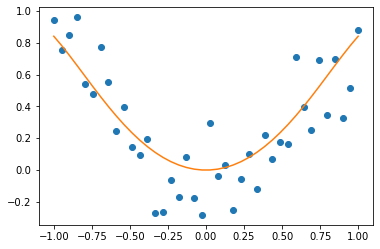

In [85]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(x,np.sin(x*x))
plt.show()


## overfitting example
Try to fit the above data by
$$
y = w_0 + w_1 x +w_2 x^2+ w_3 x^3+ w_4 x^4+ w_5 x^5+ w_6 x^6+ w_7 x^7+ w_8 x^8+ w_9 x^9
$$
using least square method

In [86]:
A=np.zeros((x.shape[0], 10))

for i in range(x.shape[0]):
    A[i,0]=1
    A[i,1]=x[i]
    A[i,2]=x[i]*x[i]
    A[i,3]=x[i]*x[i]*x[i]
    A[i,4]=x[i]*x[i]*x[i]*x[i]
    A[i,5]=x[i]*x[i]*x[i]*x[i]*x[i]
    A[i,6]=x[i]*x[i]*x[i]*x[i]*x[i]*x[i]
    A[i,7]=x[i]*x[i]*x[i]*x[i]*x[i]*x[i]*x[i]
    A[i,8]=x[i]*x[i]*x[i]*x[i]*x[i]*x[i]*x[i]*x[i]
    A[i,9]=x[i]*x[i]*x[i]*x[i]*x[i]*x[i]*x[i]*x[i]*x[i]

In [87]:
A_simple=np.zeros((x.shape[0], 3))
for i in range(x.shape[0]):
    A_simple[i,0]=1
    A_simple[i,1]=x[i]
    A_simple[i,2]=x[i]*x[i]

w_simple=np.linalg.inv(A_simple.T@A_simple)@A_simple.T@y

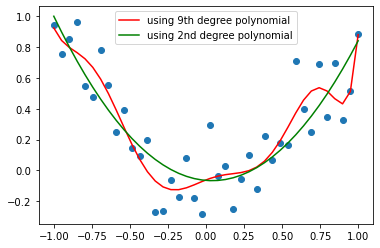

In [88]:
w=np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, y))

import matplotlib.pyplot as plt

func=lambda x: w[0]+w[1]*x+w[2]*x*x+w[3]*x**3+w[4]*x**4+w[5]*x**5+w[6]*x**6+w[7]*x**7+w[8]*x**8+w[9]*x**9
func_simple=lambda x: w_simple[0]+w_simple[1]*x+w_simple[2]*x*x
plt.plot(x, func(x), 'r', label='using 9th degree polynomial')
plt.plot(x, func_simple(x), 'g', label='using 2nd degree polynomial')
plt.legend()
plt.scatter(x, y)

plt.savefig('polynomial_fit.png')

## Using Ridge regression

In Ridge regression, the coefficient is determined by minimizing the following objective function:
$$
\sum_{i=1}^{n} (y_i - w_0 - w_1 x_i - w_2 x_i^2 - w_3 x_i^3 - w_4 x_i^4 - w_5 x_i^5 - w_6 x_i^6 - w_7 x_i^7 - w_8 x_i^8 - w_9 x_i^9)^2 + \alpha \sum_{j=0}^{9} w_j^2
$$
where $\alpha$ is a hyperparameter that controls the trade-off between the fit and the complexity of the model.

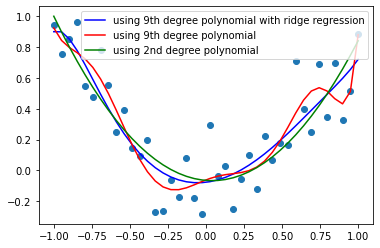

In [89]:
alpha=0.1
w_ridge=np.matmul(np.linalg.inv(np.matmul(A.T, A)+alpha*np.eye(10)), np.matmul(A.T, y))

func_ridge=lambda x: w_ridge[0]+w_ridge[1]*x+w_ridge[2]*x*x+w_ridge[3]*x**3+w_ridge[4]*x**4+w_ridge[5]*x**5+w_ridge[6]*x**6+w_ridge[7]*x**7+w_ridge[8]*x**8+w_ridge[9]*x**9

plt.plot(x, func_ridge(x), 'b', label='using 9th degree polynomial with ridge regression')
plt.plot(x, func(x), 'r', label='using 9th degree polynomial')
plt.plot(x, func_simple(x), 'g', label='using 2nd degree polynomial')
plt.legend()
plt.scatter(x, y)
plt.savefig('polynomial_fit_ridge.png')

In case you want to use Ridge regression from sklearn, you can use `Ridge` class from `sklearn.linear_model`.



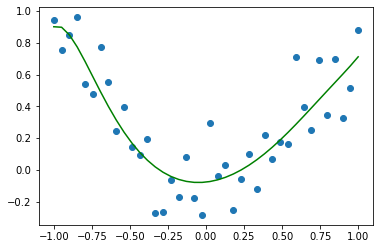

In [90]:
from sklearn.linear_model import Ridge

#define Ridge regression model
model=Ridge(alpha=0.1, solver='sag')
#fit the model
model.fit(A, y)
#predict the results
results=model.predict(A)

plt.plot(x, results, 'g')
plt.scatter(x, y)